# Вариант 1 задача №9

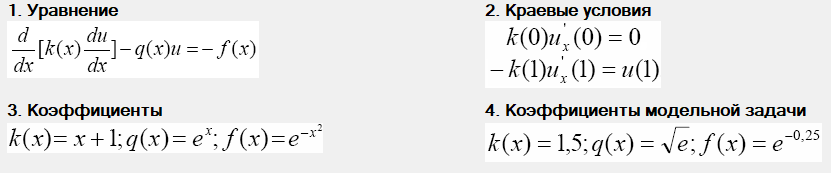

**Импорт библиотек, задание постоянных**

In [1]:
import matplotlib.pylab as plt
import numpy as np
import math as m
%matplotlib inline
e = 2.718281
eps = 0.0001
n = 40

# Аналитическое решение модельной задачи

**Постоянные в задаче**

In [2]:
km = 1.5
qm = m.sqrt(e)
fm = m.exp(-0.25)
dm1 = 0
dm2 = 1
em1 = 0
em2 = 0

In [3]:
l1 =  m.sqrt(qm / km)
l2 = -m.sqrt(qm / km)
uc =  fm / qm
C1 =  ((km * l2 + dm2) * (dm1 * fm - em1 * qm) * m.exp(l2) + (km * l2 - dm1) * (dm2 * fm - em2 * qm)) / (qm * ((km * l1 - dm1) * (km * l2 + dm2) * m.exp(l2) - (km * l2 - dm1) * (km * l1 + dm2) * m.exp(l1)))
C2 =  ((km * l1 + dm2) * (dm1 * fm - em1 * qm) * m.exp(l1) + (km * l1 - dm1) * (dm2 * fm - em2 * qm)) / (qm * ((km * l2 - dm1) * (km * l1 + dm2) * m.exp(l1) - (km * l2 + dm2) * (km * l1 - dm1) * m.exp(l2)))

**Составление решения**

In [4]:
x = np.linspace(0 , 1 ,n + 1)
y = np.zeros(n + 1)
for i in range(n + 1):
    y[i] = C1 * m.exp(l1 * x[i]) + C2 * m.exp(l2 * x[i]) + uc

**Вывод графиков решения**

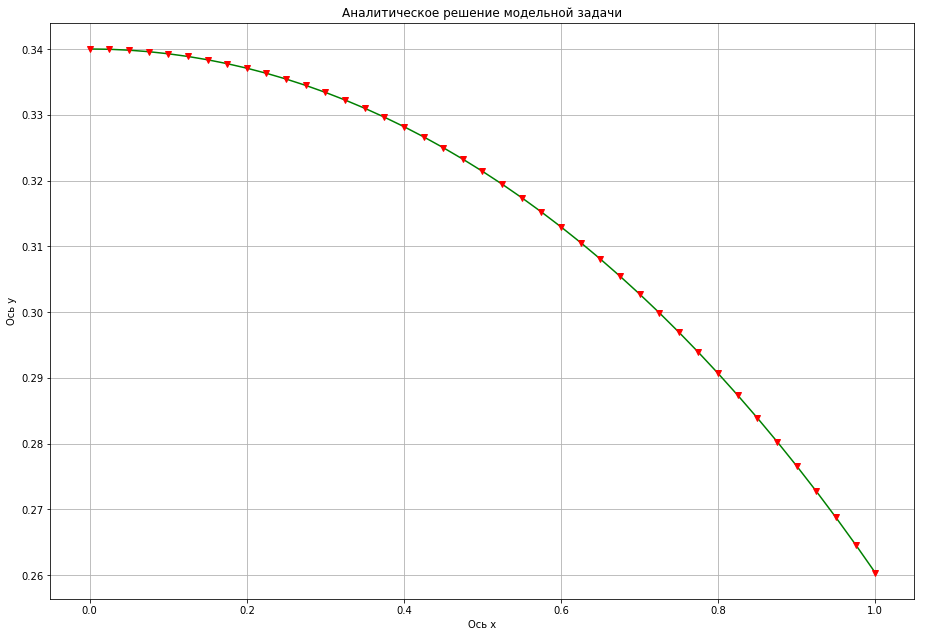

In [5]:
fig = plt.figure()
ax1 = fig.add_axes([0.125, 0.547727, 2, 2]) 
ax1.set_title(u'Аналитическое решение модельной задачи')

ax1.yaxis.set_label_position('left')
ax1.set_ylabel(u'Ось y')

ax1.xaxis.set_label_position('bottom')
ax1.set_xlabel(u'Ось x')

for ax in fig.axes:
    ax.grid(True)

ax1.plot(x, y, 'g', x, y, 'rv')


# Численное решение модельной задачи

**Прямая прогонка**

In [126]:
h = 1/n

am = np.zeros(n + 1)
bm = np.zeros(n + 1)
cm = np.zeros(n + 1)
dm = np.zeros(n + 1)

for i in range(n + 1):
    am[i] =      km
    bm[i] = -2 * km - qm * h * h
    cm[i] =      km
    dm[i] =     -fm * h * h 

am[n] =  0
bm[n] = -km - dm2 * h
cm[n] =  km
dm[n] = -em2 * h
am[0] =  km
bm[0] = -km - dm1 * h
cm[0] =  0
dm[0] = -em1 * h

print("Коэффициенты системы:")
print(am)
print(bm)
print(cm)
print(dm)
print("")
print("")

alpham = np.zeros(n + 1)
betam = np.zeros(n + 1)
alpham[0] = -am[0] / bm[0]
betam[0] = dm[0] / bm[0]

for i in range(1, n + 1, 1):
    alpham[i] = -am[i] / (bm[i] + cm[i] * alpham[i - 1])
    betam[i] = (dm[i] - cm[i] * betam[i - 1]) / (bm[i] + cm[i] * alpham[i - 1])
    
print("Коэффициенты сеточной функции:")
print(alpham)
print(betam)
print("")
print("")

um = np.zeros(n + 1)
um[n] = (dm[n] - cm[n] * betam[n - 1]) / (bm[n] + cm[n] * alpham[n - 1])
print("Значение сеточной функции в последней точке:")
print(um[n])

Коэффициенты системы:
[ 1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5
  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5
  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  0. ]
[-1.5        -3.00103045 -3.00103045 -3.00103045 -3.00103045 -3.00103045
 -3.00103045 -3.00103045 -3.00103045 -3.00103045 -3.00103045 -3.00103045
 -3.00103045 -3.00103045 -3.00103045 -3.00103045 -3.00103045 -3.00103045
 -3.00103045 -3.00103045 -3.00103045 -3.00103045 -3.00103045 -3.00103045
 -3.00103045 -3.00103045 -3.00103045 -3.00103045 -3.00103045 -3.00103045
 -3.00103045 -3.00103045 -3.00103045 -3.00103045 -3.00103045 -3.00103045
 -3.00103045 -3.00103045 -3.00103045 -3.00103045 -1.525     ]
[ 0.   1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5
  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5
  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5]
[ 0.         -0.00048675 -0.00048675 -0.00048675 -0.00048675

**Обратная прогонка**

In [127]:
for i in range(n-1, -1, -1):                       # [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
    um[i] = alpham[i - 1] * um[i + 1] + betam[i]
um[0] = alpham[0] * um[1] + betam[0]
print(um)

[ 0.34264497  0.34264497  0.34232069  0.34190752  0.3414054   0.34081419
  0.3401337   0.33936367  0.33850378  0.33755362  0.33651273  0.33538057
  0.33415652  0.33283991  0.33142996  0.32992585  0.32832667  0.32663141
  0.32483903  0.32294836  0.32095819  0.31886721  0.31667403  0.31437719
  0.31197514  0.30946624  0.30684878  0.30412096  0.3012809   0.29832663
  0.29525609  0.29206714  0.28875754  0.285325    0.28176708  0.2780813
  0.27426506  0.27031568  0.26623038  0.26200629  0.25764042]


**Построение сеточной функции:**

*Легенда:<br>*
**<font color=green>Зеленый</font>** - аналитическое решение модельной задачи<br>
**<font color=blue>Синий</font>**   - численное решение модельной задачи

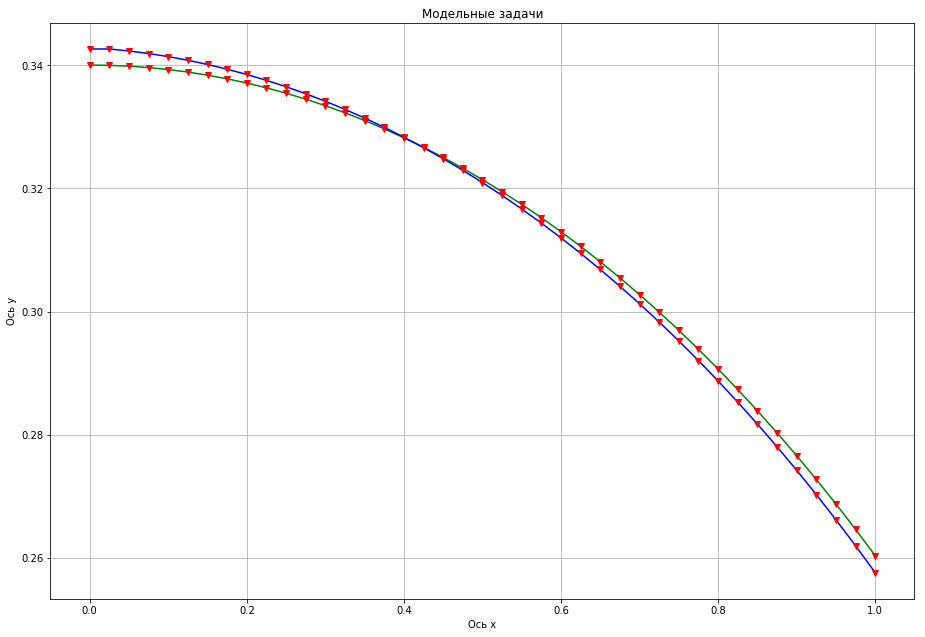

In [128]:
fig = plt.figure()
ax1 = fig.add_axes([0.125, 0.547727, 2, 2]) 
ax1.set_title(u'Модельные задачи')

ax1.yaxis.set_label_position('left')
ax1.set_ylabel(u'Ось y')

ax1.xaxis.set_label_position('bottom')
ax1.set_xlabel(u'Ось x')

for ax in fig.axes:
    ax.grid(True)

ax1.plot(x, y, 'g', x, y, 'rv',x, um, 'b', x, um, 'rv')

# Численное решение задачи с переменными коэффициентами

In [129]:
xplus = np.zeros(n + 1)
xminus = np.zeros(n + 1)
q = np.zeros(n + 1)
f = np.zeros(n + 1)
kplus = np.zeros(n + 1)
kminus = np.zeros(n + 1)

for i in range(n + 1):
    xplus[i] = i * h + h / 2
    xminus[i] = i * h - h / 2
    q[i] = m.exp(x[i])
    f[i] = m.exp(-x[i] * x[i])
    kplus[i] = xplus[i] + 1
    kminus[i] = xminus[i] + 1
print("Сетка")
print(xplus)
print(xminus)
print("")
print("q(x):", q)
print("f(x):", f)
print("k(x+1/2):", kplus)
print("k(x-1/2):", kminus)
print("")

Сетка
[ 0.0125  0.0375  0.0625  0.0875  0.1125  0.1375  0.1625  0.1875  0.2125
  0.2375  0.2625  0.2875  0.3125  0.3375  0.3625  0.3875  0.4125  0.4375
  0.4625  0.4875  0.5125  0.5375  0.5625  0.5875  0.6125  0.6375  0.6625
  0.6875  0.7125  0.7375  0.7625  0.7875  0.8125  0.8375  0.8625  0.8875
  0.9125  0.9375  0.9625  0.9875  1.0125]
[-0.0125  0.0125  0.0375  0.0625  0.0875  0.1125  0.1375  0.1625  0.1875
  0.2125  0.2375  0.2625  0.2875  0.3125  0.3375  0.3625  0.3875  0.4125
  0.4375  0.4625  0.4875  0.5125  0.5375  0.5625  0.5875  0.6125  0.6375
  0.6625  0.6875  0.7125  0.7375  0.7625  0.7875  0.8125  0.8375  0.8625
  0.8875  0.9125  0.9375  0.9625  0.9875]

q(x): [ 1.          1.02531512  1.0512711   1.07788415  1.10517092  1.13314845
  1.16183424  1.19124622  1.22140276  1.25232272  1.28402542  1.31653067
  1.34985881  1.38403065  1.41906755  1.45499141  1.4918247   1.52959042
  1.56831219  1.6080142   1.64872127  1.69045885  1.73325302  1.77713053
  1.8221188   1.86824596  1

**Прямая прогонка**

In [130]:
k0 = 1
k1 = 2
d1 = 0
d2 = 1
e1 = 0
e2 = 0
a = np.zeros(n + 1)
b = np.zeros(n + 1)
c = np.zeros(n + 1)
d = np.zeros(n + 1)

for i in range(n + 1):
    a[i] =      kplus[i]
    b[i] = -(kplus[i] + kminus[i] + q[i] * h * h)
    c[i] =      kminus[i]
    d[i] =     -f[i] * h * h
a[0] =  k0
b[0] = -(k0 + d1 * h)
c[0] =  0
d[0] = -e1 * h
a[n] =  0
b[n] = -(k1 + d2 * h)
c[n] =  k1
d[n] = -e2 * h

print("Коэффициенты системы:")
print("a(x):",a)
print("b(x):",b)
print("c(x):",c)
print("d(x):",d)
print("")
print("")

alpha = np.zeros(n + 1)
beta = np.zeros(n + 1)
alpha[0] = -a[0] / b[0]
beta[0] = d[0] / b[0]

for i in range(1, n + 1, 1):
    alpha[i] = -a[i] / (b[i] + c[i] * alpha[i - 1])
    beta[i] = (d[i] - c[i] * beta[i - 1]) / (b[i] + c[i] * alpha[i - 1])
    
print("Коэффициенты сеточной функции:")
print("alpha(x):",alpha)
print("beta(x):",beta)
print("")
print("")

u = np.zeros(n + 1)
u[n] = (d[n] - c[n] * beta[n - 1]) / (b[n] + c[n] * alpha[n - 1])
print("Значение сеточной функции в последней точке:")
print(u[n])

Коэффициенты системы:
a(x): [ 1.      1.0375  1.0625  1.0875  1.1125  1.1375  1.1625  1.1875  1.2125
  1.2375  1.2625  1.2875  1.3125  1.3375  1.3625  1.3875  1.4125  1.4375
  1.4625  1.4875  1.5125  1.5375  1.5625  1.5875  1.6125  1.6375  1.6625
  1.6875  1.7125  1.7375  1.7625  1.7875  1.8125  1.8375  1.8625  1.8875
  1.9125  1.9375  1.9625  1.9875  0.    ]
b(x): [-1.         -2.05064082 -2.10065704 -2.15067368 -2.20069073 -2.25070822
 -2.30072615 -2.35074453 -2.40076338 -2.4507827  -2.50080252 -2.55082283
 -2.60084366 -2.65086502 -2.70088692 -2.75090937 -2.80093239 -2.85095599
 -2.9009802  -2.95100501 -3.00103045 -3.05105654 -3.10108328 -3.15111071
 -3.20113882 -3.25116765 -3.30119721 -3.35122752 -3.4012586  -3.45129046
 -3.50132313 -3.55135662 -3.60139096 -3.65142618 -3.70146228 -3.7514993
 -3.80153725 -3.85157617 -3.90161607 -3.95165698 -2.025     ]
c(x): [ 0.      1.0125  1.0375  1.0625  1.0875  1.1125  1.1375  1.1625  1.1875
  1.2125  1.2375  1.2625  1.2875  1.3125  1.3375  1.36

**Обратная прогонка**

In [131]:
for i in range(n-1, -1, -1):                       # [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
    u[i] = alpha[i - 1] * u[i + 1] + beta[i]
u[0] = alpha[0] * u[1] + beta[0]
print("Значения сеточной функции:",u)

Значения сеточной функции: [ 0.36366905  0.36366905  0.36306739  0.36211807  0.36084392  0.35926678
  0.35740764  0.35528669  0.35292334  0.35033633  0.34754372  0.34456294
  0.34141084  0.33810369  0.33465721  0.33108662  0.3274066   0.32363135
  0.3197746   0.31584958  0.31186908  0.30784546  0.3037906   0.29971598
  0.29563264  0.29155119  0.28748187  0.28343449  0.27941847  0.27544284
  0.27151627  0.26764705  0.26384312  0.26011206  0.25646114  0.25289726
  0.24942705  0.2460568   0.24279254  0.23964     0.23660466]


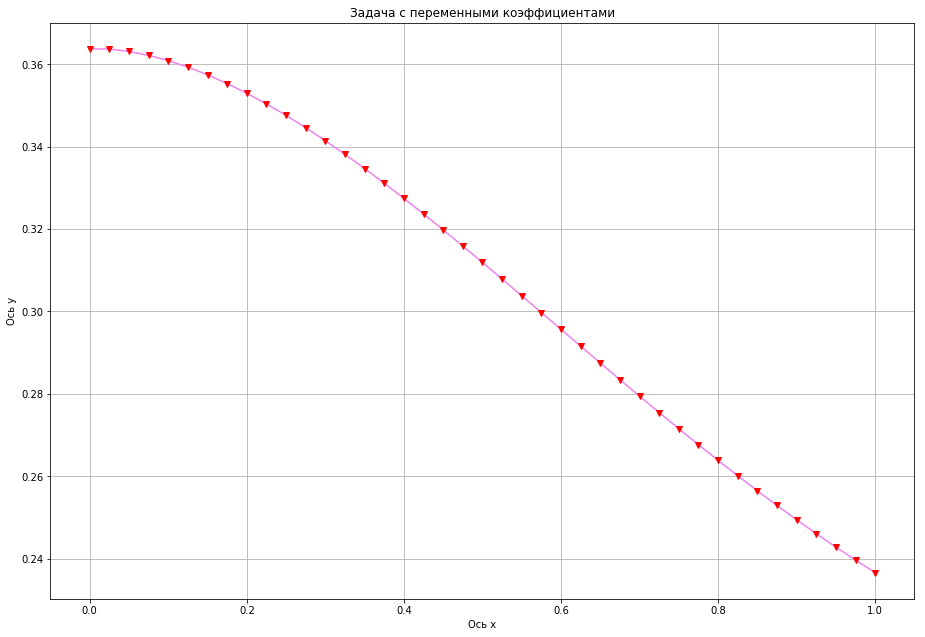

In [132]:
fig = plt.figure()
ax1 = fig.add_axes([0.125, 0.547727, 2, 2]) 
ax1.set_title(u'Задача с переменными коэффициентами')

ax1.yaxis.set_label_position('left')
ax1.set_ylabel(u'Ось y')

ax1.xaxis.set_label_position('bottom')
ax1.set_xlabel(u'Ось x')

for ax in fig.axes:
    ax.grid(True)

ax1.plot(x, u, 'violet', x, u, 'rv')

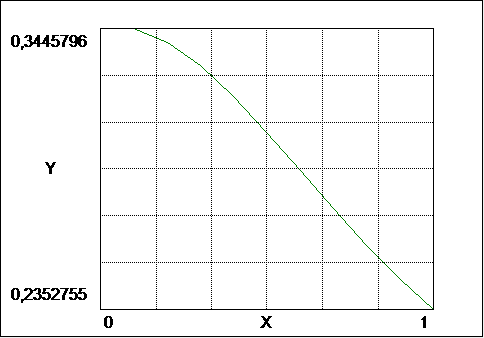

**Построение сеточной функции:**

*Легенда:<br>*
**<font color=green>Зеленый</font>** - аналитическое решение модельной задачи<br>
**<font color=blue>Синий</font>**   - численное решение модельной задачи<br>
**<font color=violet>Фиолетовый</font>** - численное решение задачи с переменными коэффициентами

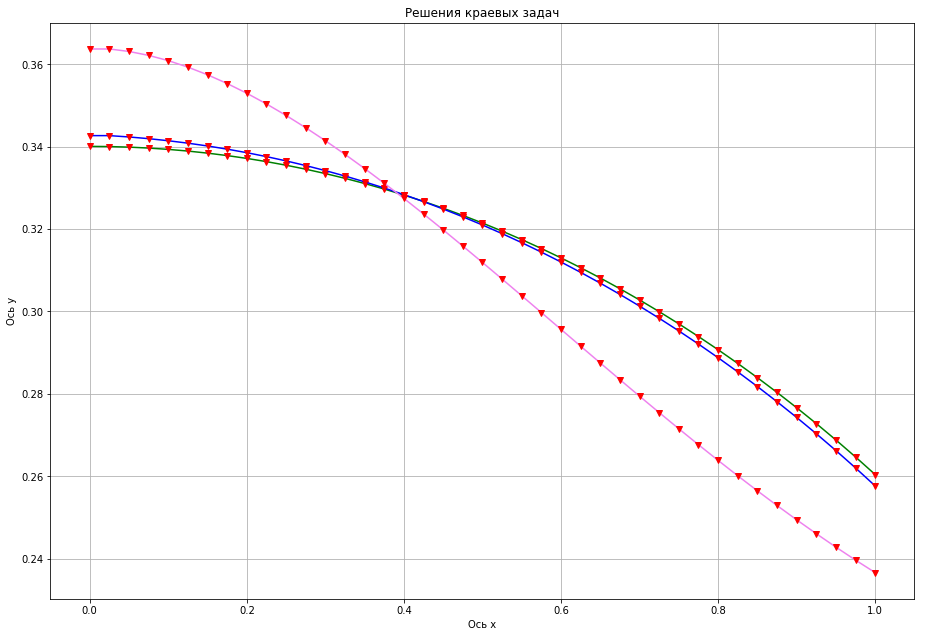

In [133]:
fig = plt.figure()
ax1 = fig.add_axes([0.125, 0.547727, 2, 2]) 
ax1.set_title(u'Решения краевых задач')

ax1.yaxis.set_label_position('left')
ax1.set_ylabel(u'Ось y')

ax1.xaxis.set_label_position('bottom')
ax1.set_xlabel(u'Ось x')

for ax in fig.axes:
    ax.grid(True)


ax1.plot(x, y, 'g', x, y, 'rv',x, um, 'b', x, um, 'rv', x, u, 'violet', x, u, 'rv')

Увеличение порядка аппроксимации

In [134]:
xrplus = np.zeros(n + 1)
xrminus = np.zeros(n + 1)
qr = np.zeros(n + 1)
fr = np.zeros(n + 1)
krplus = np.zeros(n + 1)
krminus = np.zeros(n + 1)

for i in range(n + 1):
    xrplus[i] = i * h + h / 2
    xrminus[i] = i * h - h / 2
    qr[i] = m.exp(x[i])
    fr[i] = m.exp(-x[i] * x[i])
    krplus[i] = xrplus[i] + 1
    krminus[i] = xrminus[i] + 1
print("Сетка")
print(xrplus)
print(xrminus)
print("")
print("q(x):", qr)
print("f(x):", fr)
print("k(x+1/2):", krplus)
print("k(x-1/2):", krminus)
print("")

Сетка
[ 0.0125  0.0375  0.0625  0.0875  0.1125  0.1375  0.1625  0.1875  0.2125
  0.2375  0.2625  0.2875  0.3125  0.3375  0.3625  0.3875  0.4125  0.4375
  0.4625  0.4875  0.5125  0.5375  0.5625  0.5875  0.6125  0.6375  0.6625
  0.6875  0.7125  0.7375  0.7625  0.7875  0.8125  0.8375  0.8625  0.8875
  0.9125  0.9375  0.9625  0.9875  1.0125]
[-0.0125  0.0125  0.0375  0.0625  0.0875  0.1125  0.1375  0.1625  0.1875
  0.2125  0.2375  0.2625  0.2875  0.3125  0.3375  0.3625  0.3875  0.4125
  0.4375  0.4625  0.4875  0.5125  0.5375  0.5625  0.5875  0.6125  0.6375
  0.6625  0.6875  0.7125  0.7375  0.7625  0.7875  0.8125  0.8375  0.8625
  0.8875  0.9125  0.9375  0.9625  0.9875]

q(x): [ 1.          1.02531512  1.0512711   1.07788415  1.10517092  1.13314845
  1.16183424  1.19124622  1.22140276  1.25232272  1.28402542  1.31653067
  1.34985881  1.38403065  1.41906755  1.45499141  1.4918247   1.52959042
  1.56831219  1.6080142   1.64872127  1.69045885  1.73325302  1.77713053
  1.8221188   1.86824596  1

In [135]:
kr0 = 1
kr1 = 2
dr1 = 0
dr2 = 1
er1 = 0
er2 = 0
ar = np.zeros(n + 1)
br = np.zeros(n + 1)
cr = np.zeros(n + 1)
dr = np.zeros(n + 1)

for i in range(n + 1):
    ar[i] =      krplus[i]
    br[i] = -(krplus[i] + krminus[i] + qr[i] * h * h)
    cr[i] =      krminus[i]
    dr[i] =     -fr[i] * h * h
ar[0] =  kr0
br[0] = -(kr0 + dr1 * h + qr[0] * h * h/2)
cr[0] =  0
dr[0] = -(h * h)/2 
ar[n] =  0
br[n] = -(kr1 + dr2 * h + qr[n] * h * h / 2)
cr[n] =  kr1
dr[n] = - h * h / 2 

print("Коэффициенты системы:")
print("a(x):",ar)
print("b(x):",br)
print("c(x):",cr)
print("d(x):",dr)
print("")
print("")

alphar = np.zeros(n + 1)
betar = np.zeros(n + 1)
alphar[0] = -ar[0] / br[0]
betar[0] = dr[0] / br[0]

for i in range(1, n + 1, 1):
    alphar[i] = -ar[i] / (br[i] + cr[i] * alphar[i - 1])
    betar[i] = (dr[i] - cr[i] * betar[i - 1]) / (br[i] + cr[i] * alphar[i - 1])
    
print("Коэффициенты сеточной функции:")
print("alpha(x):",alphar)
print("beta(x):",betar)
print("")
print("")

ur = np.zeros(n + 1)
ur[n] = (dr[n] - cr[n] * betar[n - 1]) / (br[n] + cr[n] * alphar[n - 1])
print("Значение сеточной функции в последней точке:")
print(ur[n])

Коэффициенты системы:
a(x): [ 1.      1.0375  1.0625  1.0875  1.1125  1.1375  1.1625  1.1875  1.2125
  1.2375  1.2625  1.2875  1.3125  1.3375  1.3625  1.3875  1.4125  1.4375
  1.4625  1.4875  1.5125  1.5375  1.5625  1.5875  1.6125  1.6375  1.6625
  1.6875  1.7125  1.7375  1.7625  1.7875  1.8125  1.8375  1.8625  1.8875
  1.9125  1.9375  1.9625  1.9875  0.    ]
b(x): [-1.0003125  -2.05064082 -2.10065704 -2.15067368 -2.20069073 -2.25070822
 -2.30072615 -2.35074453 -2.40076338 -2.4507827  -2.50080252 -2.55082283
 -2.60084366 -2.65086502 -2.70088692 -2.75090937 -2.80093239 -2.85095599
 -2.9009802  -2.95100501 -3.00103045 -3.05105654 -3.10108328 -3.15111071
 -3.20113882 -3.25116765 -3.30119721 -3.35122752 -3.4012586  -3.45129046
 -3.50132313 -3.55135662 -3.60139096 -3.65142618 -3.70146228 -3.7514993
 -3.80153725 -3.85157617 -3.90161607 -3.95165698 -2.02584946]
c(x): [ 0.      1.0125  1.0375  1.0625  1.0875  1.1125  1.1375  1.1625  1.1875
  1.2125  1.2375  1.2625  1.2875  1.3125  1.3375  1.36

In [136]:
for i in range(n-1, -1, -1):                       # [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
    ur[i] = alphar[i - 1] * ur[i + 1] + betar[i]
ur[0] = alphar[0] * ur[1] + betar[0] 
print("Значения сеточной функции:",ur)

Значения сеточной функции: [ 0.37107246  0.37087592  0.37008546  0.36895624  0.36751062  0.36577009
  0.36375526  0.36148598  0.35898136  0.35625984  0.3533392   0.35023664
  0.34696876  0.34355161  0.34000072  0.33633111  0.33255727  0.32869326
  0.32475262  0.32074847  0.31669347  0.31259982  0.30847932  0.30434332
  0.30020277  0.29606819  0.29194973  0.28785713  0.28379972  0.27978649
  0.27582605  0.27192662  0.26809611  0.26434206  0.26067168  0.25709187
  0.25360922  0.25023001  0.24696024  0.24380564  0.24077169]


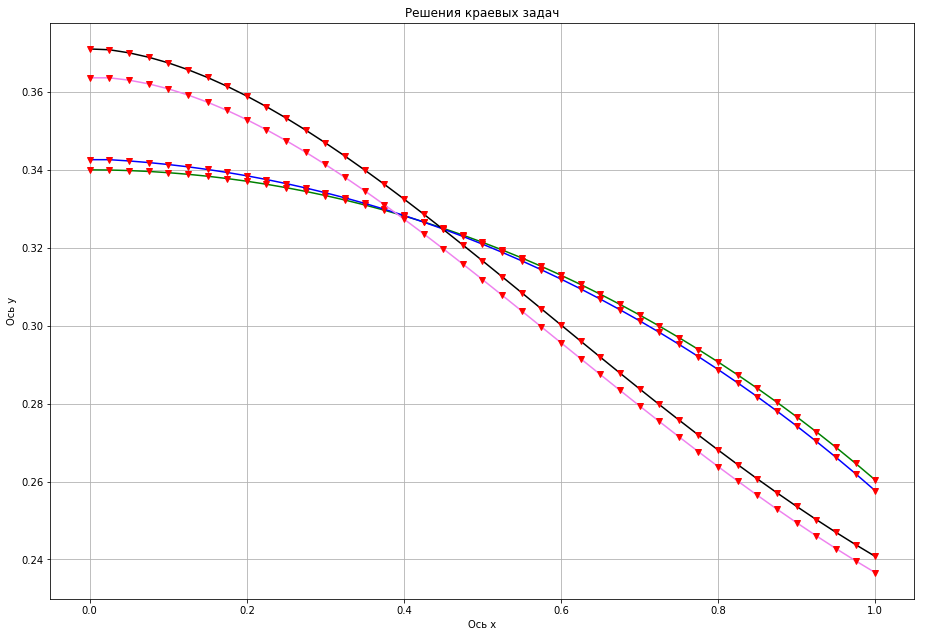

In [137]:
fig = plt.figure()
ax1 = fig.add_axes([0.125, 0.547727, 2, 2]) 
ax1.set_title(u'Решения краевых задач')

ax1.yaxis.set_label_position('left')
ax1.set_ylabel(u'Ось y')

ax1.xaxis.set_label_position('bottom')
ax1.set_xlabel(u'Ось x')

for ax in fig.axes:
    ax.grid(True)


ax1.plot(x, y, 'g', x, y, 'rv',x, um, 'b', x, um, 'rv', x, u, 'violet', x, u, 'rv', x, ur, 'black', x, ur, 'rv')

In [138]:

kmr = 1.5
qmr = m.sqrt(e)
fmr = m.exp(-0.25)
dmr1 = 0
dmr2 = 1
emr1 = 0
emr2 = 0
h = 1/n

amr = np.zeros(n + 1)
bmr = np.zeros(n + 1)
cmr = np.zeros(n + 1)
dmr = np.zeros(n + 1)

for i in range(n + 1):
    amr[i] =      kmr
    bmr[i] = -2 * kmr - qmr * h * h
    cmr[i] =      kmr
    dmr[i] =     -fmr * h * h 

amr[n] =  0
bmr[n] = -(kmr + dmr2 * h + qmr * h * h / 2)
cmr[n] =  kmr
dmr[n] = -emr2 * h - h * h / 2*m.exp(-0.25)
amr[0] =  kmr
bmr[0] = -(kmr + dmr1 * h + qmr * h * h / 2)
cmr[0] =  0
dmr[0] = -emr1 * h - h * h / 2 *m.exp(-0.25)

print("Коэффициенты системы:")
print(amr)
print(bmr)
print(cmr)
print(dmr)
print("")
print("")

alphamr = np.zeros(n + 1)
betamr = np.zeros(n + 1)
alphamr[0] = -amr[0] / bmr[0]
betamr[0] = dmr[0] / bmr[0]

for i in range(1, n + 1, 1):
    alphamr[i] = -amr[i] / (bmr[i] + cmr[i] * alphamr[i - 1])
    betamr[i] = (dmr[i] - cmr[i] * betamr[i - 1]) / (bmr[i] + cmr[i] * alphamr[i - 1])
    
print("Коэффициенты сеточной функции:")
print(alphamr)
print(betamr)
print("")
print("")

umr = np.zeros(n + 1)
umr[n] = (dmr[n] - cmr[n] * betamr[n - 1]) / (bmr[n] + cmr[n] * alphamr[n - 1])
print("Значение сеточной функции в последней точке:")
print(umr[n])
for i in range(n-1, -1, -1):                       # [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
    umr[i] = alphamr[i - 1] * umr[i + 1] + betamr[i] 
umr[0] = alphamr[0] * umr[1] + betamr[0] 
print(umr)

Коэффициенты системы:
[ 1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5
  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5
  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  0. ]
[-1.50051523 -3.00103045 -3.00103045 -3.00103045 -3.00103045 -3.00103045
 -3.00103045 -3.00103045 -3.00103045 -3.00103045 -3.00103045 -3.00103045
 -3.00103045 -3.00103045 -3.00103045 -3.00103045 -3.00103045 -3.00103045
 -3.00103045 -3.00103045 -3.00103045 -3.00103045 -3.00103045 -3.00103045
 -3.00103045 -3.00103045 -3.00103045 -3.00103045 -3.00103045 -3.00103045
 -3.00103045 -3.00103045 -3.00103045 -3.00103045 -3.00103045 -3.00103045
 -3.00103045 -3.00103045 -3.00103045 -3.00103045 -1.52551523]
[ 0.   1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5
  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5
  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5]
[-0.00024338 -0.00048675 -0.00048675 -0.00048675 -0.00048675

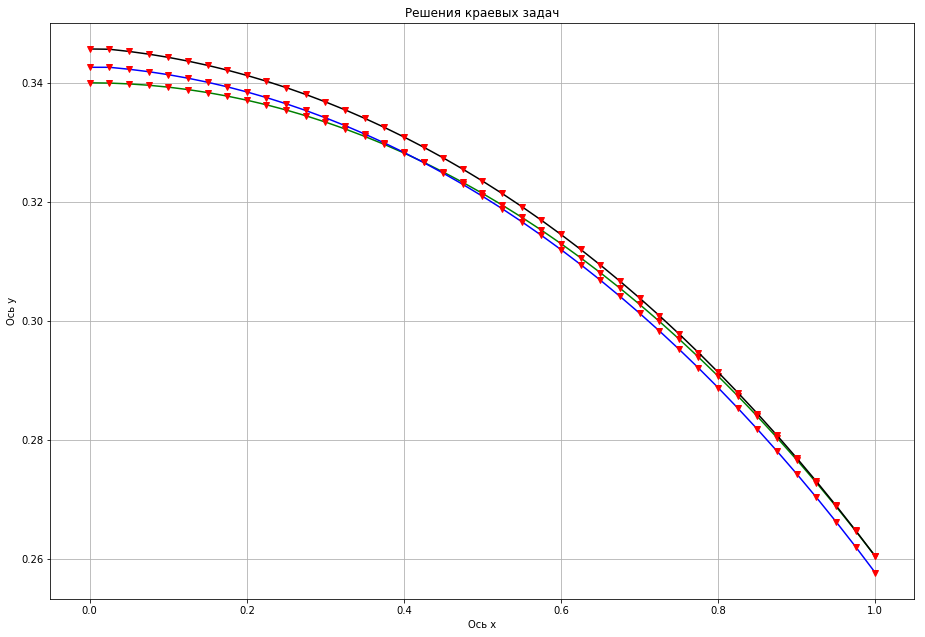

In [139]:
fig = plt.figure()
ax1 = fig.add_axes([0.125, 0.547727, 2, 2]) 
ax1.set_title(u'Решения краевых задач')

ax1.yaxis.set_label_position('left')
ax1.set_ylabel(u'Ось y')

ax1.xaxis.set_label_position('bottom')
ax1.set_xlabel(u'Ось x')

for ax in fig.axes:
    ax.grid(True)


ax1.plot(x, y, 'g', x, y, 'rv',x, um, 'b', x, um, 'rv', x, umr, 'black', x, umr, 'rv')